In [1]:
import cubewalkers as cw
import cupy as cp
from copy import deepcopy

In [2]:
IMPORT_RULES_FROM_FILES = True
cc_models_dir = './models/cell_collective/'
if IMPORT_RULES_FROM_FILES:
    from os import listdir
    
    sync_models = {}
    for fname in listdir(cc_models_dir):
        with open(cc_models_dir+fname) as rulefile:
            name = fname.strip('.txt')
            rules = rulefile.read()
            sync_models[name]=cw.Model(rules)
else:
    from cana.datasets.bio import load_all_cell_collective_models
    def cell_collective_models():
        return {BN.name:cw.Model(cw.conversions.network_rules_from_cana(BN)) 
                for BN in load_all_cell_collective_models()}
    sync_models = cell_collective_models()
    for name,model in sync_models.items():
        with open(cc_models_dir+name+'.txt','w') as rulefile:
            rulefile.write(model.rules)

total_models = len(sync_models)
async_models = deepcopy(sync_models)

In [3]:
def derrida_cell_coll(models, sync=True ,W=100000):
    derrida_coefficients = {}
    for model_idx, (model_name, model) in enumerate(models.items()):
        N = model.n_variables
        
        if sync:
            print(f"Calculating Derrida coefficient in synchronous for {model_name} ({N=},{W=}). . .")
            model.n_walkers = W
            derrida_coefficients[model_name] = float(model.derrida_coefficient(threads_per_block=(16,16)))
        else:
            print(f"Calculating Derrida coefficient in asynchronous for {model_name} ({N=},{W=}). . .")
            model.n_time_steps = N
            model.n_walkers = W // N
            derrida_asynch = cp.zeros((N+1))
            for node in model.vardict:
                di = model.dynamical_impact(source_var=node,maskfunction=cw.update_schemes.asynchronous,threads_per_block=(16,16))
                di = cp.sum(di, axis=1)
                derrida_asynch += di
            derrida_asynch /= N
            derrida_coefficients[model_name] = float(derrida_asynch[-1])
            
        print(f"Progress: {(model_idx+1)}/{total_models}")
    return derrida_coefficients

In [4]:
sync_derrida_coefficients = derrida_cell_coll(sync_models,sync=True)

Calculating Derrida coefficient in synchronous for Apoptosis Network (N=41,W=100000). . .
Progress: 1/74
Calculating Derrida coefficient in synchronous for Arabidopsis thaliana Cell Cycle (N=14,W=100000). . .
Progress: 2/74
Calculating Derrida coefficient in synchronous for Aurora Kinase A in Neuroblastoma (N=23,W=100000). . .
Progress: 3/74
Calculating Derrida coefficient in synchronous for B bronchiseptica and T retortaeformis coinfection (N=53,W=100000). . .
Progress: 4/74
Calculating Derrida coefficient in synchronous for B cell differentiation (N=22,W=100000). . .
Progress: 5/74
Calculating Derrida coefficient in synchronous for Bordetella bronchiseptica (N=33,W=100000). . .
Progress: 6/74
Calculating Derrida coefficient in synchronous for Bortezomib Responses in U266 Human Myeloma Cells (N=67,W=100000). . .
Progress: 7/74
Calculating Derrida coefficient in synchronous for BT474 Breast Cell Line Long-term ErbB Network (N=25,W=100000). . .
Progress: 8/74
Calculating Derrida coeffic

Progress: 67/74
Calculating Derrida coefficient in synchronous for Toll Pathway of Drosophila Signaling Pathway (N=11,W=100000). . .
Progress: 68/74
Calculating Derrida coefficient in synchronous for Treatment of Castration-Resistant Prostate Cancer (N=42,W=100000). . .
Progress: 69/74
Calculating Derrida coefficient in synchronous for Trichostrongylus retortaeformis (N=26,W=100000). . .
Progress: 70/74
Calculating Derrida coefficient in synchronous for Tumour Cell Invasion and Migration (N=32,W=100000). . .
Progress: 71/74
Calculating Derrida coefficient in synchronous for VEGF Pathway of Drosophila Signaling Pathway (N=18,W=100000). . .
Progress: 72/74
Calculating Derrida coefficient in synchronous for Wg Pathway of Drosophila Signalling Pathways (N=26,W=100000). . .
Progress: 73/74
Calculating Derrida coefficient in synchronous for Yeast Apoptosis (N=73,W=100000). . .
Progress: 74/74


In [5]:
async_derrida_coefficients = derrida_cell_coll(sync_models,sync=False)

Calculating Derrida coefficient in asynchronous for Apoptosis Network (N=41,W=100000). . .
Progress: 1/74
Calculating Derrida coefficient in asynchronous for Arabidopsis thaliana Cell Cycle (N=14,W=100000). . .
Progress: 2/74
Calculating Derrida coefficient in asynchronous for Aurora Kinase A in Neuroblastoma (N=23,W=100000). . .
Progress: 3/74
Calculating Derrida coefficient in asynchronous for B bronchiseptica and T retortaeformis coinfection (N=53,W=100000). . .
Progress: 4/74
Calculating Derrida coefficient in asynchronous for B cell differentiation (N=22,W=100000). . .
Progress: 5/74
Calculating Derrida coefficient in asynchronous for Bordetella bronchiseptica (N=33,W=100000). . .
Progress: 6/74
Calculating Derrida coefficient in asynchronous for Bortezomib Responses in U266 Human Myeloma Cells (N=67,W=100000). . .
Progress: 7/74
Calculating Derrida coefficient in asynchronous for BT474 Breast Cell Line Long-term ErbB Network (N=25,W=100000). . .
Progress: 8/74
Calculating Derrida

Progress: 66/74
Calculating Derrida coefficient in asynchronous for TOL Regulatory Network (N=24,W=100000). . .
Progress: 67/74
Calculating Derrida coefficient in asynchronous for Toll Pathway of Drosophila Signaling Pathway (N=11,W=100000). . .
Progress: 68/74
Calculating Derrida coefficient in asynchronous for Treatment of Castration-Resistant Prostate Cancer (N=42,W=100000). . .
Progress: 69/74
Calculating Derrida coefficient in asynchronous for Trichostrongylus retortaeformis (N=26,W=100000). . .
Progress: 70/74
Calculating Derrida coefficient in asynchronous for Tumour Cell Invasion and Migration (N=32,W=100000). . .
Progress: 71/74
Calculating Derrida coefficient in asynchronous for VEGF Pathway of Drosophila Signaling Pathway (N=18,W=100000). . .
Progress: 72/74
Calculating Derrida coefficient in asynchronous for Wg Pathway of Drosophila Signalling Pathways (N=26,W=100000). . .
Progress: 73/74
Calculating Derrida coefficient in asynchronous for Yeast Apoptosis (N=73,W=100000). .

In [6]:
print(f'{"":>80}\tsynch\tasynch')
for model_name in sorted(sync_models):
    synch = round(sync_derrida_coefficients[model_name],3)
    asynch = round(async_derrida_coefficients[model_name],3)
    print(f'{model_name:>80}\t{synch}\t{asynch}')

                                                                                	synch	asynch
                                                               Apoptosis Network	1.004	1.035
                                                 Arabidopsis thaliana Cell Cycle	1.276	1.217
                                                Aurora Kinase A in Neuroblastoma	1.052	1.062
                               B bronchiseptica and T retortaeformis coinfection	0.995	1.003
                                                          B cell differentiation	0.994	1.011
                                   BT474 Breast Cell Line Long-term ErbB Network	0.944	0.924
                                  BT474 Breast Cell Line Short-term ErbB Network	0.763	0.823
                                                       Bordetella bronchiseptica	1.011	0.99
                                Bortezomib Responses in U266 Human Myeloma Cells	0.981	1.004
                                                        Budding Yeast 

In [7]:
with open('./data/derrida_coefficients.csv','w') as f:
    for model_name in sorted(sync_models):
        f.write(f'{model_name},synchronous,{round(sync_derrida_coefficients[model_name],3)},')
        f.write(f'asynchronous,{round(async_derrida_coefficients[model_name],3)}\n')

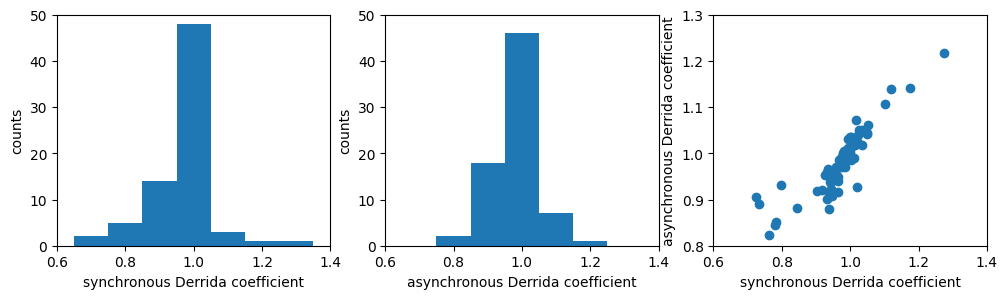

In [8]:
import matplotlib.pyplot as plt
import numpy as np

x = [j for (i,j) in sync_derrida_coefficients.items()]
y = [j for (i,j) in async_derrida_coefficients.items()]

plt.figure(figsize=(12, 3))

plt.subplot(131)
counts, bins1 = np.histogram(x, bins=7, range=(0.65,1.35))
plt.hist(bins1[:-1], bins1, weights=counts)
plt.axis([0.6, 1.4, 0, 50])
plt.xlabel('synchronous Derrida coefficient')
plt.ylabel('counts')

plt.subplot(132)
counts, bins2 = np.histogram(y, bins=7, range=(0.65,1.35))
plt.hist(bins2[:-1], bins2, weights=counts)
plt.axis([0.6, 1.4, 0, 50])
plt.xlabel('asynchronous Derrida coefficient')
plt.ylabel('counts')

plt.subplot(133)
plt.scatter(x, y)
plt.xlabel('synchronous Derrida coefficient')
plt.ylabel('asynchronous Derrida coefficient')
plt.axis([0.6, 1.4, 0.8, 1.3])
plt.show()